# Fresh Fish Classification Project
## Introduction
This notebook presents a machine learning project aimed at classifying fish species from images. We utilize convolutional neural networks (CNNs) to accurately identify different species, aiming to assist in sustainable fishing practices and environmental conservation.


In [ ]:
import numpy as np
import pandas as pd#to manupilate labelled data
import os#path from the system
import matplotlib.pyplot as plt #plot graph
import tensorflow as tf #depolyment,training

from tensorflow.keras.utils import to_categorical #neural computation
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score #identifing ,classifing data based on patterns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/MyDrive/fresh and non-fresh fish'

## Dataset Description
The dataset used in this project consists of images of several fish species, annotated with their respective labels. This section should provide details about the dataset's source, structure, and any preprocessing steps applied.

In [ ]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['fresh', 'non-fresh']
2


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]
print(N)

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
    return reverse_mapping[value]

[0, 1]


## Data Preprocessing
This section outlines the steps taken to prepare the data for model training, including image resizing, normalization, augmentation techniques used, and splitting the dataset into training, validation, and test sets.


In [ ]:
File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

fresh
non-fresh


In [ ]:
trainx0=[]
testx0=[]
trainy0=[]
testy0=[]
count=0
for file in File:
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(50,50))
        image=img_to_array(image)
        image=image/255.0
        n=len(os.listdir(path))#n=no of images
        if t<(n//10)*8:
            trainx0.append(image)
            trainy0.append(count)
        else:
            testx0.append(image)
            testy0.append(count)
        t+=1
    count=count+1

In [ ]:
trainy2=to_categorical(trainy0)#converts integer to binary
X_train=np.array(trainx0).reshape(-1,50,50,3)
y_train=np.array(trainy2)

In [ ]:
X_test=np.array(testx0).reshape(-1,50,50,3)

In [ ]:
trainx,testx,trainy,testy=train_test_split(X_train,y_train,test_size=0.2,random_state=44)#get training and test sets

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(89, 50, 50, 3)
(23, 50, 50, 3)
(89, 2)
(23, 2)


## Model Architecture
Here we describe the CNN architecture used for fish species classification. This might include the number of layers, types of layers (convolutional, pooling, dense), and any regularization techniques employed.

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(50,50,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Training Process
Details about the training process are provided in this section, including the choice of optimizer, loss function, batch size, number of epochs, and any callbacks used during training.


In [ ]:
try:
    his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)
except:
    print('not found')

Epoch 1/30
3/3 [==============================] - 25s 5s/step - loss: 0.6433 - accuracy: 0.6629 - val_loss: 0.4478 - val_accuracy: 0.6957
Epoch 2/30
3/3 [==============================] - 0s 63ms/step - loss: 0.3139 - accuracy: 0.8764 - val_loss: 0.3465 - val_accuracy: 0.7826
Epoch 3/30
3/3 [==============================] - 0s 69ms/step - loss: 0.2457 - accuracy: 0.9326 - val_loss: 0.3055 - val_accuracy: 0.9565
Epoch 4/30
3/3 [==============================] - 0s 62ms/step - loss: 0.2760 - accuracy: 0.8989 - val_loss: 0.2464 - val_accuracy: 0.9565
Epoch 5/30
3/3 [==============================] - 0s 63ms/step - loss: 0.2022 - accuracy: 0.9213 - val_loss: 0.2044 - val_accuracy: 0.9565
Epoch 6/30
3/3 [==============================] - 0s 60ms/step - loss: 0.1912 - accuracy: 0.9326 - val_loss: 0.1786 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 63ms/step - loss: 0.1430 - accuracy: 0.9438 - val_loss: 0.1606 - val_accuracy: 1.0000
Epoch 8/30
3/3 [============

## Evaluation and Results
This section presents the results of the model evaluation on the test set. It includes metrics such as accuracy, precision, recall, and F1-score, along with visualizations like confusion matrices or example predictions.

In [ ]:
try:
    y_pred=model.predict(testx)
    pred=np.argmax(y_pred,axis=1)
    ground = np.argmax(testy,axis=1)
    print(classification_report(ground,pred))
except:
    print('not found')

1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



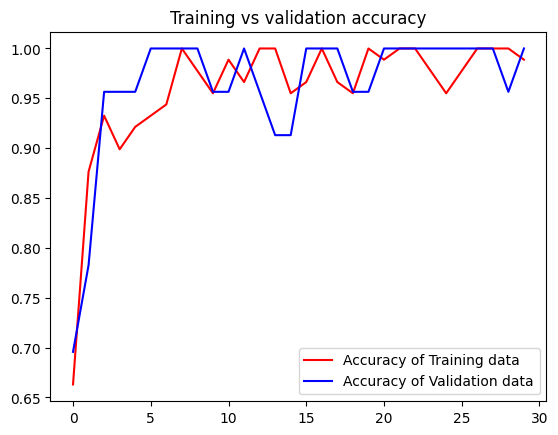

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

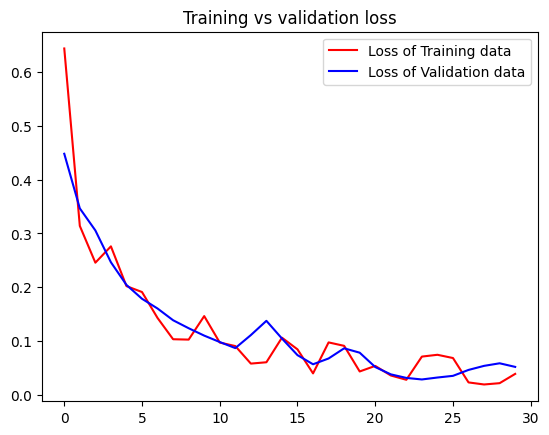

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
path0="/content/drive/MyDrive/fresh and non-fresh fish/non-fresh/IstavritBayat (29).jpg"
load_img(path0,target_size=(300,300))
type(path0)

str

In [ ]:


image=load_img(path0,target_size=(50,50))
print(type(image))
image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

<class 'PIL.Image.Image'>


In [ ]:

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print(format(move_name))

1/1 [==============================] - 2s 2s/step
non-fresh


In [ ]:
pred2=model.predict(X_test)
print(pred2[0:10])

PRED=[]
for item in pred2:
    value2=np.argmax(item)
    PRED+=[value2]
print(PRED[0:10])

2/2 [==============================] - 2s 2s/step
[[9.9622464e-01 3.7753326e-03]
 [9.9710935e-01 2.8906253e-03]
 [9.8789704e-01 1.2102986e-02]
 [9.9907374e-01 9.2620164e-04]
 [9.9832803e-01 1.6719692e-03]
 [9.9811673e-01 1.8833366e-03]
 [9.9966812e-01 3.3184286e-04]
 [9.9604225e-01 3.9577335e-03]
 [9.9857545e-01 1.4245523e-03]
 [9.9860901e-01 1.3910559e-03]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
ANS=testy0
ANS[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.95


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score
import gradio as gr

def predict_fish(image):
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    image_resized = image.resize((300, 300))
    image_resized_small = image.resize((50, 50))

    image_array = img_to_array(image_resized_small)
    image_array = image_array / 255.0
    prediction_image = np.array(image_array)
    prediction_image = np.expand_dims(image_array, axis=0)

    prediction = model.predict(prediction_image)
    predicted_class_index = np.argmax(prediction)
    move_name = mapper(predicted_class_index)

    pred2 = model.predict(X_test)
    PRED = [np.argmax(item) for item in pred2]

    accuracy = accuracy_score(testy0, PRED)

    return move_name, accuracy

iface = gr.Interface(fn=predict_fish,
                     inputs=gr.Image(type="numpy"),
                     outputs=["text", "text"],
                     title="Fish Classification",
                     description="Upload an image of fish to classify it and calculate accuracy.")

iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://49397fd8438e689839.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


2/2 [==============================] - 0s 31ms/step
